In [ ]:
%matplotlib inline
# Pandas is a nice utilitiy that enables some easy data manipulation, especially from a csv
import pandas as pd
# Numpy lets us work with arrays
import numpy as np
import random
# Sklearn provides various modules with a common API
from sklearn import svm, tree, neighbors, neural_network
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
# Read in our csv files downloaded from Kaggle
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [ ]:
# We can use .head() to get just the first few rows of the data.
train_data.head()

# Note how the notebook nicely displays the output for us

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data.columns[train_data.isna().any()].tolist()

['Age', 'Cabin', 'Embarked']

In [ ]:
random.seed(100)
np.random.seed(100)
## I DECIDED TO KEEP CABIN, SO THAT IS NO LONGER IN THESE DROP COMMANDS!
train_data.drop(columns=['Name', 'Ticket', "Cabin"], inplace=True)
train_data.set_index(keys=['PassengerId'], drop=True, inplace=True)

test_data.drop(columns=['Name', 'Ticket', "Cabin"], inplace=True)
test_data.set_index(keys=['PassengerId'], drop=True, inplace=True)

train_nan_map = {'Age': train_data['Age'].mean(), 'Fare': train_data['Fare'].mean(), 'Embarked': train_data['Embarked'].mode()[0]}
test_nan_map = {'Age': train_data['Age'].mean(), 'Fare': train_data['Fare'].mean(), 'Embarked': train_data['Embarked'].mode()[0]}

train_data.fillna(value=train_nan_map, inplace=True)
test_data.fillna(value=test_nan_map, inplace=True)

columns_map = {'Embarked': {'C': 0, 'Q': 1, 'S': 2}, 'Sex': {'male': 0, 'female': 1}} # look into this; implicit issues
# Adding below line to surpress deprication warnings
pd.set_option('future.no_silent_downcasting', True)
train_data.replace(columns_map, inplace=True)
test_data.replace(columns_map, inplace=True)

X_train = train_data.loc[:, train_data.columns != 'Survived']
y_train = train_data.loc[:, 'Survived']

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=10)


In [ ]:
print(X_train.head())
print(y_train.head())
print(test_data.head())
print(f"Test Mean: {y_test.mean()}")
print(f"Train Mean: {y_train.mean()}")

             Pclass Sex        Age  SibSp  Parch    Fare Embarked
PassengerId                                                      
464               2   0  48.000000      0      0  13.000        2
160               3   0  29.699118      8      2  69.550        2
48                3   1  29.699118      0      0   7.750        1
403               3   1  21.000000      1      0   9.825        2
619               2   1   4.000000      2      1  39.000        2
PassengerId
464    0
160    0
48     1
403    0
619    1
Name: Survived, dtype: int64
             Pclass Sex   Age  SibSp  Parch     Fare Embarked
PassengerId                                                  
892               3   0  34.5      0      0   7.8292        1
893               3   1  47.0      1      0   7.0000        2
894               2   0  62.0      0      0   9.6875        1
895               3   0  27.0      0      0   8.6625        2
896               3   1  22.0      1      1  12.2875        2
Test Mean: 0.35254

In [ ]:
train_data.columns[train_data.isna().any()].tolist()
train_data[train_data['Embarked'].isna() == True]
#train_data['Embarked']
#test_data.columns[test_data.isna().any()].tolist()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,


In [ ]:
train_data.head()
# after all preprocessing, what does it look like?
# train_data["Parch"].unique()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,2
2,1,1,1,38.0,1,0,71.2833,0
3,1,3,1,26.0,0,0,7.9250,2
4,1,1,1,35.0,1,0,53.1000,2
5,0,3,0,35.0,0,0,8.0500,2


In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (596, 7)
y_train shape: (596,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict

# Initialize base models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
svc = SVC(probability=True, random_state=42)

# Train models
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
svc.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [ ]:
# Generate cross-validated predictions
rf_preds = cross_val_predict(rf, X_train, y_train, cv=5, method='predict_proba')[:, 1]
gb_preds = cross_val_predict(gb, X_train, y_train, cv=5, method='predict_proba')[:, 1]
svc_preds = cross_val_predict(svc, X_train, y_train, cv=5, method='predict_proba')[:, 1]

# Stack predictions into a new dataset
import numpy as np
meta_features = np.column_stack((rf_preds, gb_preds, svc_preds))


In [ ]:
meta_model = RandomForestClassifier(n_estimators=100, random_state=42)
meta_model.fit(meta_features, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Generate predictions from base models on X_test
rf_test_preds = rf.predict_proba(X_test)[:, 1]
gb_test_preds = gb.predict_proba(X_test)[:, 1]
svc_test_preds = svc.predict_proba(X_test)[:, 1]

# Stack test set predictions
meta_test_features = np.column_stack((rf_test_preds, gb_test_preds, svc_test_preds))

# Final prediction
final_predictions = meta_model.predict(meta_test_features)

In [ ]:
# svm_clf.fit(X_train.values, y_train.values)
# print(svm_clf.score(X_test.values, y_test.values))

final_predictions

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
matches = final_predictions == y_test.values
print(f"Accuracy: {matches.sum()/len(matches)}")

Accuracy: 0.7898305084745763


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV


# Define hyperparameter grid for RandomForest
rf_params = {
    "n_estimators": randint(50, 200),
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": randint(2, 10),
}

# Randomized search
rf = RandomForestClassifier(random_state=42)
rf_search = RandomizedSearchCV(rf, rf_params, n_iter=10, cv=5, random_state=42, n_jobs=-1)
rf_search.fit(X_train, y_train)

# Use best parameters
best_rf = rf_search.best_estimator_
print("Best Random Forest:", rf_search.best_params_)

Best Random Forest: {'max_depth': 20, 'min_samples_split': 9, 'n_estimators': 166}


In [ ]:
best_rf.fit(X_train, y_train)
best_rf.score(X_test, y_test)

0.8338983050847457

In [ ]:
y_pred = best_rf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_truth = y_test.values


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
print("Confusion Matrix")
print(confusion_matrix(y_truth, y_pred, labels=[0, 1]))
print("")
print("True Negatives", tn)
print("False Positives", fp)
print("False Negatives", fn)
print("True Positives", tp)

Confusion Matrix
[[167  24]
 [ 25  79]]

True Negatives 167
False Positives 24
False Negatives 25
True Positives 79


Confusion matrix, without normalization
[[167  24]
 [ 25  79]]


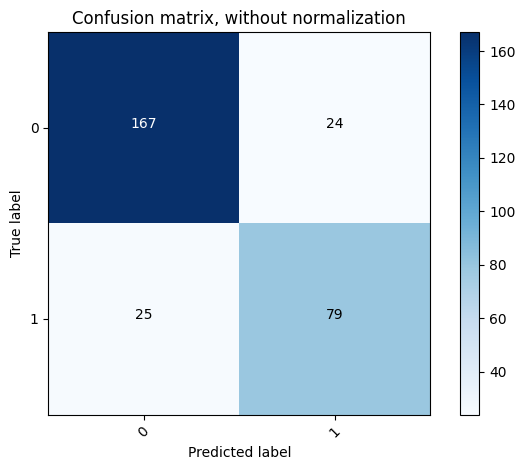

In [ ]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_truth, y_pred)
class_names=['0', '1']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

In [ ]:
predictions = best_rf.predict(test_data.values)
predictions

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
pred_df = pd.DataFrame(predictions, index=test_data.index, columns=['Survived'])
type(pred_df)
pred_df

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [ ]:
pred_df.to_csv('predictions.csv', header=True, sep=',')

EVERYTHING ELSE BELOW THIS WAS TESTING:

In [ ]:
# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression(max_iter=1000, random_state=42)
# logreg.fit(X_train, y_train)

# y_pred = logreg.predict(X_test)
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# # print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8101694915254237
Confusion Matrix:
 [[165  26]
 [ 30  74]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       191
           1       0.74      0.71      0.73       104

    accuracy                           0.81       295
   macro avg       0.79      0.79      0.79       295
weighted avg       0.81      0.81      0.81       295



In [ ]:
# # DEcision Tree Classifier?
# from sklearn.tree import DecisionTreeClassifier
# dtree = DecisionTreeClassifier(random_state=42)
# dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# score it again:
y_pred = dtree.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7491525423728813


In [ ]:
#Try a randomForestClassifier:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(n_estimators=100, random_state=42)
rforest.fit(X_train, y_train)
rforest.score(X_test, y_test)

0.7932203389830509

In [ ]:
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dtree.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importances)

    Feature  Importance
1       Sex    0.303795
5      Fare    0.275983
2       Age    0.227827
0    Pclass    0.090274
4     Parch    0.043489
3     SibSp    0.031871
6  Embarked    0.026761


In [ ]:
# choose best option:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}
grid_search = GridSearchCV(rforest, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'n_estimators': 100}


In [ ]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
best_model.score(X_test, y_test)

0.8169491525423729

In [ ]:
# from sklearn.preprocessing import OneHotEncoder

# # Identify categorical columns
# categorical_cols = ['Sex', 'Embarked']

# # Apply OneHotEncoder
# encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
# X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
# X_test_encoded = encoder.transform(X_test[categorical_cols])
# test_data_encoded = encoder.transform(test_data[categorical_cols])

# # Convert to DataFrame
# import pandas as pd
# X_train_encoded = pd.DataFrame(X_train_encoded, index=X_train.index)
# X_test_encoded = pd.DataFrame(X_test_encoded, index=X_test.index)
# test_data_encoded = pd.DataFrame(test_data_encoded, index=test_data.index)

# # Drop original categorical columns and concatenate new encoded ones
# X_train = X_train.drop(columns=categorical_cols).reset_index(drop=True)
# X_test = X_test.drop(columns=categorical_cols).reset_index(drop=True)
# test_data = test_data.drop(columns=categorical_cols).reset_index(drop=True)

X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)
test_data = pd.concat([test_data, test_data_encoded], axis=1)

In [ ]:
y_train
# y_train.shape

,Survived
PassengerId,
464,0
160,0
48,1
403,0
619,1
...,...
370,1
321,0
528,0


In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_train = y_train.values.ravel()

In [ ]:
import xgboost
import sklearn

print(f"XGBoost version: {xgboost.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")

XGBoost version: 2.1.3
Scikit-learn version: 1.6.1


In [ ]:
!pip install --upgrade xgboost scikit-learn


In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (799, 10)
y_train shape: (596,)


In [ ]:
# check for the missing ages:
ratio = np.round(train_data.Age.isna().sum()/len(train_data.index)*100, decimals=1)
print('The percentage of missing ages is ', ratio,'%')
train_data.Age.isna().sum()
# train_data.count(1)
train_data.Age[train_data.Age.isna()] = train_data.Age.mean() # replace non-ages with the average (HUGE assumption but better than having no age at all)

The percentage of missing ages is  0.0 %


<ipython-input-79-581725d2bddd>:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train_data.Age[train_data.Age.isna()] = train_data.Age.mean() # replace non-ages with the average (HUGE assumption but better than having no age at all)
<ipytho

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


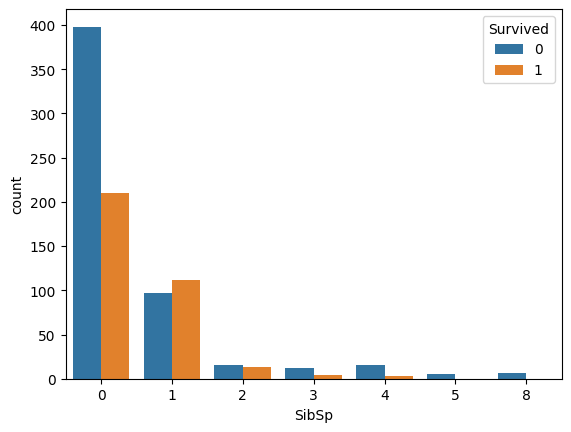

In [ ]:
sns.countplot(data=train_data,x='SibSp',hue="Survived")
train_data.SibSp.value_counts()

In [ ]:
# train_data.Parch.value_counts()

train_data.Parch.clip(upper=2,inplace=True)
oh= pd.get_dummies(train_data.Parch,prefix="Parch")
train_data = train_data.drop(labels='Parch',axis=1).join(oh)
# essentially clip value of parch

<ipython-input-49-520af65f0562>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data.Parch.clip(upper=2,inplace=True)


<ipython-input-50-14cf8ef29bac>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=train_data,x='Fare', shade=True,hue="Survived")


<Axes: xlabel='Fare', ylabel='Density'>

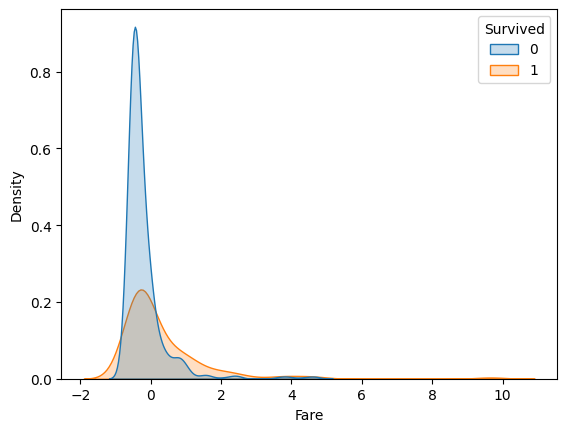

In [ ]:
#normalize the fare!!!!
train_data.Fare = (train_data.Fare-train_data.Fare.mean())/train_data.Fare.std()
sns.kdeplot(data=train_data,x='Fare', shade=True,hue="Survived")


In [ ]:
# Deal with Missing Cabin details:
train_data.Cabin[train_data.Cabin.isna()]="U"

<ipython-input-52-0b0fb0e9fa25>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train_data.Cabin[train_data.Cabin.isna()]="U"
<ipython-input-52-0b0fb0e9fa25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [ ]:
train_data.Cabin  = train_data.Cabin.str[0] # get the first letter
train_data.Cabin.value_counts()

,count
Cabin,
U,687
C,59
B,47
D,33
E,32
A,15
F,13
G,4
T,1


<Axes: xlabel='Cabin', ylabel='count'>

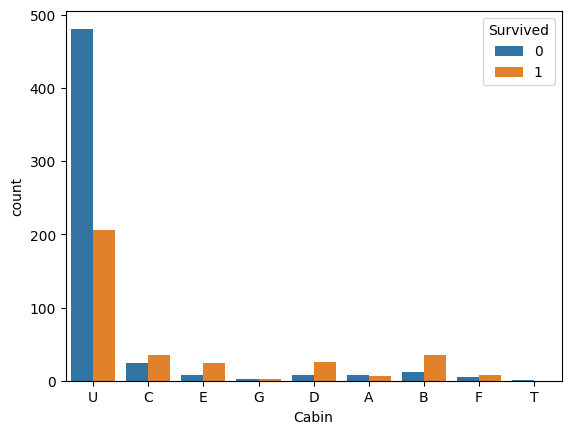

In [ ]:
sns.countplot(data=train_data,x=train_data.Cabin,hue="Survived")

In [ ]:
# Chi squared test for each of the cabins:
from scipy.stats import chi2_contingency
y = train_data.Survived
for letter in train_data.Cabin.unique():
    cab_binary = train_data.Cabin==letter
    contigency = pd.crosstab(cab_binary, y)
    c, p, dof, expected = chi2_contingency(contigency)
    p = np.round(p*100,decimals=3)
    print('Chi2 test for the independence of Cabin = ',letter,'. p-value =',p,"%")

Chi2 test for the independence of Cabin =  U . p-value = 0.0 %
Chi2 test for the independence of Cabin =  C . p-value = 0.102 %
Chi2 test for the independence of Cabin =  E . p-value = 0.003 %
Chi2 test for the independence of Cabin =  G . p-value = 100.0 %
Chi2 test for the independence of Cabin =  D . p-value = 0.002 %
Chi2 test for the independence of Cabin =  A . p-value = 69.098 %
Chi2 test for the independence of Cabin =  B . p-value = 0.0 %
Chi2 test for the independence of Cabin =  F . p-value = 14.928 %
Chi2 test for the independence of Cabin =  T . p-value = 100.0 %


In [ ]:
# we can do one-hot encoding to make the cabins with more useful info stay while rejecting poorer p-values.
oh = pd.get_dummies(train_data.Cabin,prefix="Cabin")
categories_to_drop = ['Cabin_'+i for i in ['G','A','F','T']]
oh = oh.drop(labels = categories_to_drop, axis = 1)

train_data = train_data.drop(labels='Cabin',axis=1).join(oh)

In [ ]:
train_data.Embarked.value_counts()

,count
Embarked,
2,646
0,168
1,77


In [ ]:
oh= pd.get_dummies(train_data.Embarked,prefix="Embarked")
train_data = train_data.drop(labels='Embarked',axis=1).join(oh)
# this is one hot encoding for embarked

In [ ]:
train_data.info()
train_data.corr()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Parch_0     891 non-null    bool   
 7   Parch_1     891 non-null    bool   
 8   Parch_2     891 non-null    bool   
 9   Cabin_B     891 non-null    bool   
 10  Cabin_C     891 non-null    bool   
 11  Cabin_D     891 non-null    bool   
 12  Cabin_E     891 non-null    bool   
 13  Cabin_U     891 non-null    bool   
 14  Embarked_0  891 non-null    bool   
 15  Embarked_1  891 non-null    bool   
 16  Embarked_2  891 non-null    bool   
dtypes: bool(11), float64(2), int64(3), object(1)
memory usage: 58.3+ KB


,Survived,Pclass,Sex,Age,SibSp,Fare,Parch_0,Parch_1,Parch_2,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_U,Embarked_0,Embarked_1,Embarked_2
Survived,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.257307,-0.147408,0.134174,0.056346,0.175095,0.114652,0.150716,0.145321,-0.316912,0.168240,0.003650,-0.149683
Pclass,-0.338481,1.000000,-0.131900,-0.331339,0.083081,-0.549500,0.027526,-0.049213,0.016011,-0.369572,-0.417048,-0.278690,-0.230091,0.725541,-0.243292,0.221009,0.074053
Sex,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.182333,-0.247523,0.127636,0.201880,0.109689,0.058649,0.079248,0.047003,-0.140391,0.082853,0.074115,-0.119224
Age,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,0.091566,0.261583,-0.147908,-0.199046,0.091394,0.113149,0.132319,0.117211,-0.233123,0.032024,-0.013855,-0.019336
SibSp,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.159651,-0.462241,0.199138,0.420076,-0.034538,0.029251,-0.017575,-0.036865,0.040460,-0.059528,-0.026354,0.068734
Fare,0.257307,-0.549500,0.182333,0.091566,0.159651,1.000000,-0.237717,0.114650,0.202590,0.386297,0.364318,0.098878,0.053717,-0.482075,0.269335,-0.117216,-0.162184
Parch_0,-0.147408,0.027526,-0.247523,0.261583,-0.462241,-0.237717,1.000000,-0.697070,-0.616354,-0.091402,-0.020060,-0.001548,-0.019094,0.089136,-0.032550,0.097467,-0.032821
Parch_1,0.134174,-0.049213,0.127636,-0.147908,0.199138,0.114650,-0.697070,1.000000,-0.134976,0.070737,-0.024150,0.028572,0.066942,-0.094433,0.065610,-0.049463,-0.026350
Parch_2,0.056346,0.016011,0.201880,-0.199046,0.420076,0.202590,-0.616354,-0.134976,1.000000,0.048622,0.054246,-0.029240,-0.047135,-0.019466,-0.027077,-0.080368,0.074296
Cabin_B,0.175095,-0.369572,0.109689,0.091394,-0.034538,0.386297,-0.091402,0.070737,0.048622,1.000000,-0.062841,-0.046280,-0.045547,-0.433053,0.168642,-0.072579,-0.102063


<Axes: xlabel='MI Scores', ylabel='None'>

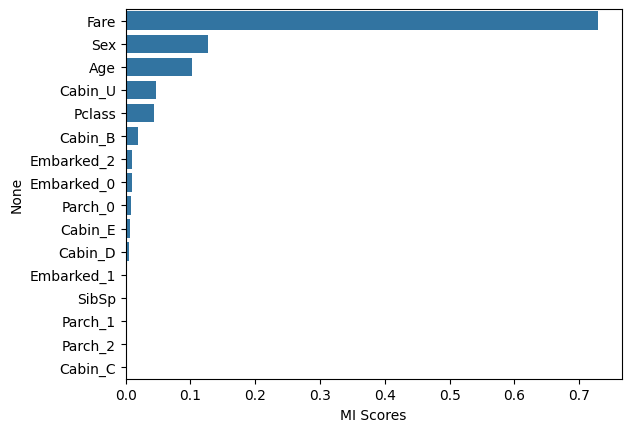

In [ ]:
# mutual information score all our features, see if certain ones matter more (pca after?)
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    X = X.copy()
    # discrete_features = [X.columns.get_loc(column_name) for column_name in X.dtypes[X.dtypes=='uint8'].index]
    # Modified line to include more dtypes for discrete features:
    discrete_features = X.select_dtypes(include=['number', 'bool', 'object', 'category']).columns
    # Get the column indices for discrete features:
    discrete_features = [X.columns.get_loc(col) for col in discrete_features]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


# train_data.drop(columns=['Survived'], inplace=True)
mi_scores = make_mi_scores(train_data, y)
train_data = train_data[mi_scores.index]
sns.barplot(x=mi_scores, y=mi_scores.index)

intercept =  1.2291255529440408


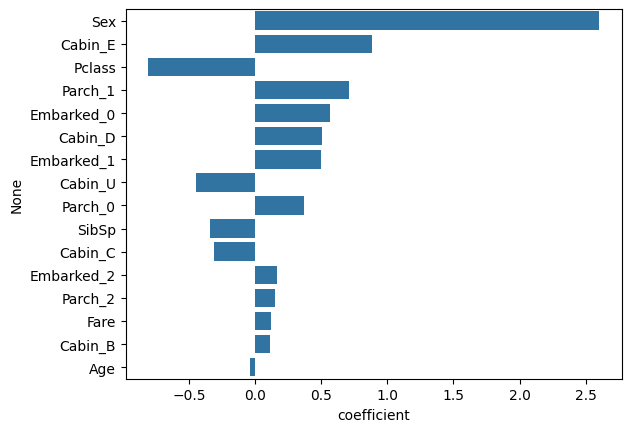

In [ ]:
from sklearn.linear_model import LogisticRegression

model_LogReg = LogisticRegression(solver='liblinear')
model_LogReg.fit(train_data, y)

coefs=pd.DataFrame({'coefficient':model_LogReg.coef_[0]}, index = train_data.columns)

coefs.sort_values('coefficient', key=abs, ascending=False,inplace=True)


sns.barplot(y=coefs.index, x=coefs['coefficient'])

print('intercept = ',model_LogReg.intercept_[0])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val= train_test_split(train_data, y, train_size=0.8, test_size=0.2,random_state=1,shuffle=True)

In [ ]:
random.seed(100)
np.random.seed(100)

tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(X_train.values, y_train.values)
print(tree_clf.score(X_test.values, y_test.values))

0.7627118644067796


In [ ]:
random.seed(100)
np.random.seed(100)

knn_clf = neighbors.KNeighborsClassifier()
knn_clf.fit(X_train.values, y_train.values)
print(knn_clf.score(X_test.values, y_test.values))

0.7084745762711865


In [ ]:
random.seed(100)
np.random.seed(100)

NN_clf = neural_network.MLPClassifier()
NN_clf.fit(X_train.values, y_train.values)
print(NN_clf.score(X_test.values, y_test.values))

0.7796610169491526


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
random.seed(100)
np.random.seed(100)

svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(X_train.values, y_train.values)
print(svm_clf.score(X_test.values, y_test.values))
y_pred = svm_clf.predict(X_test.values)
y_truth = y_test.values

0.7932203389830509


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
print("Confusion Matrix")
print(confusion_matrix(y_truth, y_pred, labels=[0, 1]))
print("")
print("True Negatives", tn)
print("False Positives", fp)
print("False Negatives", fn)
print("True Positives", tp)

Confusion Matrix
[[164  27]
 [ 34  70]]

True Negatives 164
False Positives 27
False Negatives 34
True Positives 70


Confusion matrix, without normalization
[[164  27]
 [ 34  70]]


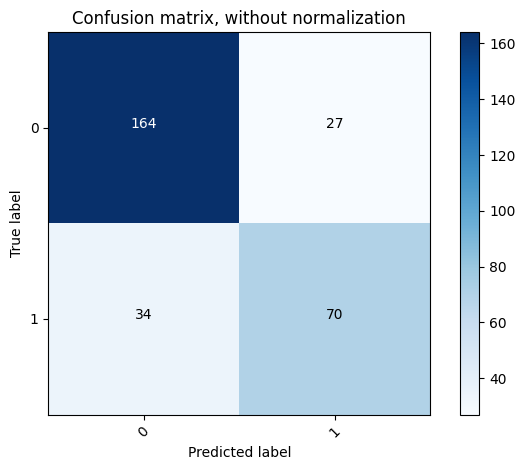

In [ ]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_truth, y_pred)
class_names=['0', '1']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

In [ ]:
predictions = svm_clf.predict(test_data.values)

In [ ]:
type(predictions)

numpy.ndarray

In [ ]:
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
pred_df = pd.DataFrame(predictions, index=test_data.index, columns=['Survived'])
type(pred_df)

pandas.core.frame.DataFrame

In [ ]:
pred_df

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [ ]:
pred_df.to_csv('predictions.csv', header=True, sep=',')